<a href="https://colab.research.google.com/github/Amanimatta/datascience_bootcamp_project/blob/main/main/McD_Menu_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as nm

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt # matplotlib for visualizations

In [ ]:
from pandas_profiling import ProfileReport
#https://github.com/pandas-profiling/pandas-profiling

In [ ]:
import seaborn as sns

In [ ]:
from google.colab import files
files.upload() 

Saving menu.csv to menu.csv


{'menu.csv': b'Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)\nBreakfast,Egg McMuffin,4.8 oz (136 g),300,120,13,20,5,25,0,260,87,750,31,31,10,4,17,3,17,10,0,25,15\nBreakfast,Egg White Delight,4.8 oz (135 g),250,70,8,12,3,15,0,25,8,770,32,30,10,4,17,3,18,6,0,25,8\nBreakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23,35,8,42,0,45,15,780,33,29,10,4,17,2,14,8,0,25,10\nBreakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28,43,10,52,0,285,95,860,36,30,10,4,17,2,21,15,0,30,15\nBreakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23,35,8,42,0,50,16,880,37,30,10,4,17,2,21,6,0,25,10\nBreakfast,Steak & Egg McMuffin,6

In [ ]:
mcd_menu = pd.read_csv('menu.csv')

In [ ]:
mcd_menu

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,45,14,280,12,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,55,19,380,16,106,35,1,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,30,9,190,8,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,60,20,400,17,114,38,2,9,103,21,20,0,60,6


In [ ]:
#understand the stats of the data
mcd_menu.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,20.676923,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,24.034954,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,4.750000,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,8.000000,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,36.250000,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,150.000000,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


In [ ]:
mcd_menu.isnull().sum()# Check if there are any null values

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

In [ ]:
mcd_menu.columns # Summarise the columns

Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

How many options do we have for each category in the Mcd Menu?

In [ ]:
#Find the unique categories along with their frequencies.
firstData = mcd_menu['Category'].value_counts()
print(firstData)

Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Beverages             27
Chicken & Fish        27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: Category, dtype: int64


In [ ]:
#plot the category vs count 
colors = ['steelblue'] 
plt.figure(figsize=(14, 5))    
plt.hist(mcd_menu.Category ,rwidth=0.9)
plt.xlabel("Category")
plt.ylabel("Count of Menu Item in the Category")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


Determine the Outliers 

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21]), <a list of 21 Text major ticklabel objects>)

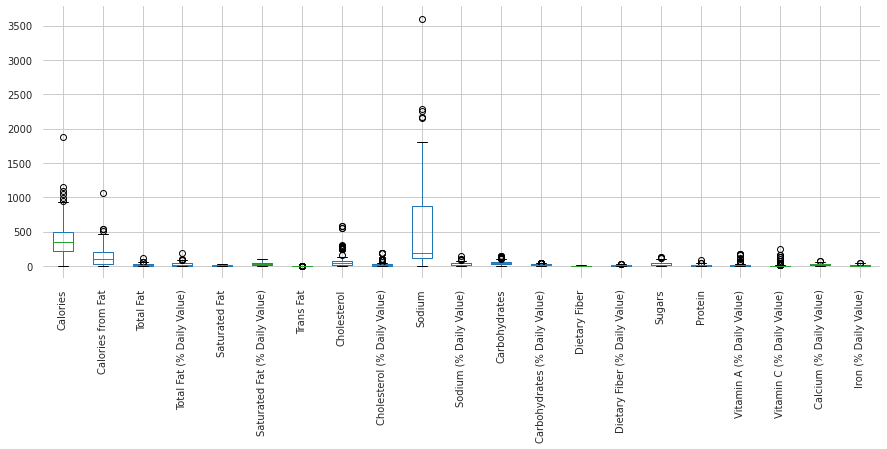

In [ ]:
mcd_menu.boxplot(figsize=(15,5));
plt.xticks(rotation=90)

### **HEALTHY EATING FROM McD MENU**



https://wa.kaiserpermanente.org/healthAndWellness/index.jhtml?item=%2Fcommon%2FhealthAndWellness%2Fconditions%2Fdiabetes%2FfoodBalancing.html



1.   CALORIES BETWEEN 300-700
2.   CHOLESTROL BETWEEN 5% TO 25%
3.   DIETERY FIBER BETWEEN 2-5 g per meal



In [ ]:
#menu items which satisfy the above conditions
mask1 = (mcd_menu['Calories'] <=700) & (mcd_menu['Calories'] >=300)
mask2 = (mcd_menu['Cholesterol (% Daily Value)'] <= 25) & (mcd_menu['Cholesterol (% Daily Value)'] >=5 )
mask3 = (mcd_menu['Dietary Fiber'] <= 5 ) & (mcd_menu['Dietary Fiber'] >= 2 )
mask1 & mask2 & mask3

healthyMcdItems = mcd_menu[mask1 & mask2 & mask3]
healthyMcdItems['Category'].value_counts()

Breakfast             19
Chicken & Fish        14
Coffee & Tea           8
Beef & Pork            2
Salads                 1
Smoothies & Shakes     1
Name: Category, dtype: int64

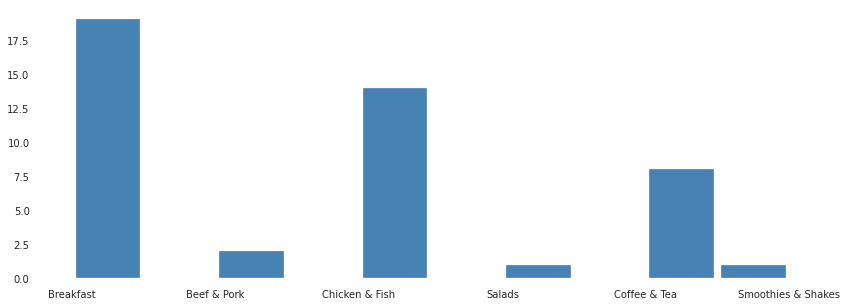

In [ ]:
colors = ['steelblue'] 
plt.figure(figsize=(14, 5))    
plt.hist(healthyMcdItems.Category ,rwidth=0.9, color = colors)
    
#plt.legend(prop ={'size': 10})   
plt.show()

# **HAPPY HEALTHY MEAL**
Create a happy healthy meal by choosing 1 salad, 1 smoothie and 1 Chicken & Fish from the the results of the above query

In [ ]:
#choose the above items randomly from the healthyMCD Items set
#get the data associated with Category salads
saladMask = (healthyMcdItems['Category'] == 'Salads')
healthysmoothieMask = (healthyMcdItems['Category'] == 'Smoothies & Shakes')
meatMask = (healthyMcdItems['Category'] == 'Chicken & Fish')

#randomly select an item to create a happy meal

happyMeal = healthyMcdItems[saladMask].sample()

happyMeal = happyMeal.append(healthyMcdItems[healthysmoothieMask].sample())

happyMeal = happyMeal.append(healthyMcdItems[meatMask].sample())

happyMeal

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
85,Salads,Premium Bacon Ranch Salad with Crispy Chicken,9 oz (255 g),380,190,21.0,33,6.0,29,0.0,70,23,860,36,22,7,2,10,5,25,100,25,15,8
248,Smoothies & Shakes,Chocolate Shake (Medium),16 fl oz cup,700,180,20.0,30,12.0,62,1.0,75,24,300,13,114,38,2,6,97,15,25,0,50,10
68,Chicken & Fish,Bacon Buffalo Ranch McChicken,5.7 oz (161 g),430,190,21.0,32,5.0,25,0.0,50,17,1260,53,41,14,2,7,6,20,2,10,15,15


# Does Coffee instead of Smoothie increase the nutrition count in consumption?

In [ ]:
smoothieMask = mcd_menu['Category'] == 'Smoothies & Shakes'
coffeeMask = mcd_menu['Category'] == 'Coffee & Tea'


comparisonDf = pd.DataFrame()
comparisonDf['SmoothiesContent'] = mcd_menu[smoothieMask].mean()
comparisonDf['Coffee&Tea Content'] = mcd_menu[coffeeMask].mean()
comparisonDf

,SmoothiesContent,Coffee&Tea Content
Calories,531.428571,283.894737
Calories from Fat,127.678571,71.105263
Total Fat,14.125000,8.021053
Total Fat (% Daily Value),21.714286,12.357895
Saturated Fat,8.375000,4.921053
Saturated Fat (% Daily Value),41.785714,24.368421
Trans Fat,0.535714,0.142105
Cholesterol,45.000000,27.263158
Cholesterol (% Daily Value),14.714286,9.378947
Sodium,183.571429,136.894737


## **Calories vs Total Fat**

In [ ]:
#plot the Calories to Total Fat graph inorder to understand the spread over each category
sns.scatterplot(data= mcd_menu,x = 'Calories',y = 'Total Fat', hue = 'Category', size=30)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **PROFILING**

In [ ]:
!pip install pandas-profiling==2.8.0

     |████████████████████████████████| 266kB 9.3MB/s 
     |████████████████████████████████| 1.1MB 22.9MB/s 
     |████████████████████████████████| 81kB 4.9MB/s 
     |████████████████████████████████| 61kB 4.2MB/s 
     |████████████████████████████████| 3.2MB 29.9MB/s 
     |████████████████████████████████| 296kB 32.6MB/s 
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=3bf49b80654a5693d01dcb89bd9d348ee18d17d6fd8f30e401900d0eedbfe7f5
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=f6f8cbdfd736ffbf6222cb79e39e024123b59ec358f40da67e0de8a33eedb70c
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built phik htmlmin
ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.
  Found existing in

In [ ]:
#For exploratory data 
profile = ProfileReport(mcd_menu)
profile.to_file("mcd_menu_profiling.html")

Summarize dataset:   0%|          | 0/38 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]